In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split

# Regression

In [2]:
data = os.path.join("data", "fantasy_10000.json")
fantasy_df = pd.read_json(data, lines = True)

## 1. What is the distribution of ratings and review lengths in the dataset? Report the number of 1-, 2-, 3-star (etc.) ratings, and show the relationship with length (e.g. via a scatterplot) (1 mark).

In [3]:
ratings_counts = fantasy_df['rating'].value_counts()
print(ratings_counts)

4    3265
5    3232
3    2113
2     778
0     326
1     286
Name: rating, dtype: int64


In [4]:
len_reviews= fantasy_df['review_text'].str.len()
print(len_reviews)

0       2086
1       1521
2       1519
3       1791
4       1762
        ... 
9995    3174
9996     594
9997      95
9998       3
9999     852
Name: review_text, Length: 10000, dtype: int64


Text(0, 0.5, 'review length')

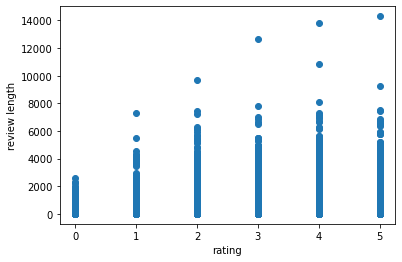

In [5]:
plt.scatter(fantasy_df['rating'], len_reviews)
plt.xlabel("rating")
plt.ylabel("review length")

## 2. Train a simple predictor that estimates rating from review length, i.e., star rating ' θ0 + θ1 × [review length in characters] Report the values θ0 and θ1, and the Mean Squared Error of your predictor (on the entire dataset) (1 mark).

In [6]:
# star rating ~ theta_0 + theta_1 * [review length in characters]

In [7]:
y = fantasy_df['rating'].values
x = len_reviews
X = np.vstack([np.ones(len(x)),x]).T
theta,residuals,rank,s = np.linalg.lstsq(X, y)

<ipython-input-7-dd6889909d97>:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta,residuals,rank,s = np.linalg.lstsq(X, y)


In [8]:
theta_0, theta_1 = theta[0], theta[1]
print("theta_0: ",theta_0)
print("theta_1: ",theta_1)

theta_0:  3.685681355016898
theta_1:  6.873716748962716e-05


In [9]:
#rating is equal to 3.69 + 6.87e-05*length of review

In [10]:
y_pred = theta_0 + theta_1*len_reviews.values
y_pred

array([3.82906709, 3.79023059, 3.79009311, ..., 3.69221139, 3.68588757,
       3.74424542])

or "cleaner" way using sklearn...

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X, y)

LinearRegression()

In [14]:
y__pred = lr.predict(X)

In [15]:
y__pred

array([3.82906709, 3.79023059, 3.79009311, ..., 3.69221139, 3.68588757,
       3.74424542])

In [16]:
print("MSE of predictor: ", MSE(y, y_pred))

MSE of predictor:  1.5522086622355378


## 3. Re-train your predictor so as to include a second feature based on the number of comments, i.e., star rating ' θ0 + θ1 × [length] + θ2 × [number of comments] Report the values of θ0, θ1, and θ2, along with the MSE of the new model. Briefly explain why the coefficient θ1 in this model is different from the one in Question 2.

In [17]:
df_2 = fantasy_df[['review_text', 'n_comments']]
df_2

,review_text,n_comments
0,This is a special book. It started slow for ab...,1
1,A beautiful story. Neil Gaiman is truly a uniq...,1
2,Mark Watney is a steely-eyed missile man. A ma...,5
3,A fun fast paced book that sucks you in right ...,1
4,"This book has a great premise, and is full of ...",0
...,...,...
9995,*I got this book from Netgalley in exchange fo...,0
9996,"I quite enjoyed Carmilla. Obviously, there was...",0
9997,Hmm... You can't be serious... 2018????? This ...,0
9998,RTC,0


In [18]:
df_2['len_review_text'] = len_reviews
df_2['normalized_len_review'] = df_2.len_review_text / df_2.len_review_text.max()
df_2

<ipython-input-18-973b7a53a8e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['len_review_text'] = len_reviews
<ipython-input-18-973b7a53a8e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['normalized_len_review'] = df_2.len_review_text / df_2.len_review_text.max()


,review_text,n_comments,len_review_text,normalized_len_review
0,This is a special book. It started slow for ab...,1,2086,0.145813
1,A beautiful story. Neil Gaiman is truly a uniq...,1,1521,0.106319
2,Mark Watney is a steely-eyed missile man. A ma...,5,1519,0.106179
3,A fun fast paced book that sucks you in right ...,1,1791,0.125192
4,"This book has a great premise, and is full of ...",0,1762,0.123165
...,...,...,...,...
9995,*I got this book from Netgalley in exchange fo...,0,3174,0.221865
9996,"I quite enjoyed Carmilla. Obviously, there was...",0,594,0.041521
9997,Hmm... You can't be serious... 2018????? This ...,0,95,0.006641
9998,RTC,0,3,0.000210


In [19]:
X_2= np.vstack([np.ones(len(x)),df_2.len_review_text, df_2.n_comments]).T
X_2

theta,residuals,rank,s = np.linalg.lstsq(X_2, y)
print(theta)

[ 3.68916737e+00  7.58407490e-05 -3.27928935e-02]


<ipython-input-19-c342a0a07f7c>:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta,residuals,rank,s = np.linalg.lstsq(X_2, y)


In [20]:
theta_0, theta_1, theta_2 = theta[0], theta[1], theta[2]
print("theta_0: ",theta_0)
print("theta_1: ",theta_1)
print("theta_2: ",theta_2)


theta_0:  3.6891673742900823
theta_1:  7.584074903973337e-05
theta_2:  -0.0327928935445479


In [21]:
lr2 = LinearRegression()
lr2.fit(X_2, y)

LinearRegression()

In [22]:
y2_pred = lr2.predict(X_2)

In [23]:
print("MSE of predictor: ", MSE(y, y2_pred))

MSE of predictor:  1.5498351692774583


The inclusion of a new parameter changes theta_1, the change, though small, could indicate some collinearity.Also, In Q2 we only have one feature but in Q3 we now have added a feature. Basically we are now taking an extra variable into account in predicting ratings. Depending on how theta_1 changes we can say if this new feature impacted our prediction about ratings.

## 4. Train a model that fits a polynomial function to estimate ratings based on review length. I.e., star rating ' θ0 + θ1 × [length] + θ2 × [length]**2 + θ3 × [length]**3 
## Fit polynomials up to degree five (i.e., including up to [length]**5) and report the MSE of each. Hint: instead of fitting length directly, you can rescale the feature to be between zero and one by dividing by the maximum length in the dataset; this may help to prevent numerical stability issues.

In [24]:
df_2

,review_text,n_comments,len_review_text,normalized_len_review
0,This is a special book. It started slow for ab...,1,2086,0.145813
1,A beautiful story. Neil Gaiman is truly a uniq...,1,1521,0.106319
2,Mark Watney is a steely-eyed missile man. A ma...,5,1519,0.106179
3,A fun fast paced book that sucks you in right ...,1,1791,0.125192
4,"This book has a great premise, and is full of ...",0,1762,0.123165
...,...,...,...,...
9995,*I got this book from Netgalley in exchange fo...,0,3174,0.221865
9996,"I quite enjoyed Carmilla. Obviously, there was...",0,594,0.041521
9997,Hmm... You can't be serious... 2018????? This ...,0,95,0.006641
9998,RTC,0,3,0.000210


In [25]:
X_1 = np.vstack([np.ones(len(x)),df_2.normalized_len_review]).T

lr1 = LinearRegression()
lr1.fit(X_1, y)
y1_pred = lr1.predict(X_1)
print("MSE of predictor (degree 1): ", MSE(y, y1_pred))


MSE of predictor (degree 1):  1.5522086622355378


In [26]:
X_2 = np.vstack([np.ones(len(x)),df_2.normalized_len_review, df_2.normalized_len_review**2]).T

lr2 = LinearRegression()
lr2.fit(X_2, y)
y2_pred = lr2.predict(X_2)
print("MSE of predictor (degree 2): ", MSE(y, y2_pred))


MSE of predictor (degree 2):  1.5506567696339388


In [27]:
X_3= np.vstack([np.ones(len(x)),df_2.normalized_len_review, df_2.normalized_len_review**2, df_2.normalized_len_review**3]).T

theta,residuals,rank,s = np.linalg.lstsq(X_3, y)
print(theta)

[ 3.63659658  2.8884065  -8.48042966  6.12504475]


<ipython-input-27-2f069f447c8f>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta,residuals,rank,s = np.linalg.lstsq(X_3, y)


In [28]:
lr3 = LinearRegression()
lr3.fit(X_3, y)
y3_pred = lr3.predict(X_3)
print("MSE of predictor (degree 3): ", MSE(y, y3_pred))


MSE of predictor (degree 3):  1.549798532380553


In [29]:
X_4 = np.vstack([np.ones(len(x)),df_2.normalized_len_review, df_2.normalized_len_review**2, df_2.normalized_len_review**3, df_2.normalized_len_review**4]).T
theta,residuals,rank,s = np.linalg.lstsq(X_4, y)
print(theta)

[  3.64736873   2.20419719  -1.80763945 -11.6451833   12.21844408]


<ipython-input-29-f15f1939d4fe>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta,residuals,rank,s = np.linalg.lstsq(X_4, y)


In [30]:
lr4 = LinearRegression()
lr4.fit(X_4, y)
y4_pred = lr4.predict(X_4)
print("MSE of predictor (degree 4): ", MSE(y, y4_pred))


MSE of predictor (degree 4):  1.5496291324524718


In [31]:
X_5 = np.vstack([np.ones(len(x)),df_2.normalized_len_review, df_2.normalized_len_review**2, df_2.normalized_len_review**3, 
                 df_2.normalized_len_review**4,df_2.normalized_len_review**5]).T
theta,residuals,rank,s = np.linalg.lstsq(X_5, y)
print(theta)

[  3.6441158    2.47396326  -5.65441081   5.55309592 -15.94637484
  14.68100179]


<ipython-input-31-198495008c3c>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta,residuals,rank,s = np.linalg.lstsq(X_5, y)


In [32]:
lr5 = LinearRegression()
lr5.fit(X_5, y)
y5_pred = lr5.predict(X_5)
print("MSE of predictor (degree 5): ", MSE(y, y5_pred))

MSE of predictor (degree 5):  1.5496142023298694


## 5. Repeat the above question, but this time split the data into a training and test set. You should split the data randomly into 50%/50% train/test fractions. Report the MSE of each model separately on the training and test sets.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_2.normalized_len_review, y, test_size=0.5)

In [34]:
X_train1 = np.vstack([np.ones(len(X_train)),X_train]).T
X_test1 = np.vstack([np.ones(len(X_test)),X_test]).T

lr1 = LinearRegression()
lr1.fit(X_train1, y_train)
y1train_pred = lr1.predict(X_train1)
y1test_pred = lr1.predict(X_test1)
print("training MSE of predictor (degree 1): ", MSE(y_train, y1train_pred))
print("testing MSE of predictor (degree 1): ", MSE(y_test, y1test_pred))

training MSE of predictor (degree 1):  1.5390457377522053
testing MSE of predictor (degree 1):  1.565381608461469


In [35]:
X_train2 = np.vstack([np.ones(len(X_train)),X_train, X_train**2]).T
X_test2 = np.vstack([np.ones(len(X_test)),X_test, X_train**2]).T

lr2 = LinearRegression()
lr2.fit(X_train2, y_train)
y2train_pred = lr2.predict(X_train2)
y2test_pred = lr2.predict(X_test2)
print("training MSE of predictor (degree 2): ", MSE(y_train, y2train_pred))
print("testing MSE of predictor (degree 2): ", MSE(y_test, y2test_pred))

training MSE of predictor (degree 2):  1.5387964291469067
testing MSE of predictor (degree 2):  1.5671072455905872


In [36]:
X_train3= np.vstack([np.ones(len(X_train)),X_train, X_train**2, X_train**3]).T
X_test3 = np.vstack([np.ones(len(X_test)),X_test, X_test**2, X_test**3]).T

lr3 = LinearRegression()
lr3.fit(X_train3, y_train)
y3train_pred = lr3.predict(X_train3)
y3test_pred = lr3.predict(X_test3)
print("training MSE of predictor (degree 3): ", MSE(y_train, y3train_pred))
print("testing MSE of predictor (degree 3): ", MSE(y_test, y3test_pred))

training MSE of predictor (degree 3):  1.5387893766316814
testing MSE of predictor (degree 3):  1.5635620079026231


In [37]:
X_train4= np.vstack([np.ones(len(X_train)),X_train, X_train**2, X_train**3, X_train**4]).T
X_test4 = np.vstack([np.ones(len(X_test)), X_test, X_test**2, X_test**3, X_test**4]).T

lr4 = LinearRegression()
lr4.fit(X_train4, y_train)
y4train_pred = lr4.predict(X_train4)
y4test_pred = lr4.predict(X_test4)
print("training MSE of predictor (degree 4): ", MSE(y_train, y4train_pred))
print("testing MSE of predictor (degree 4): ", MSE(y_test, y4test_pred))

training MSE of predictor (degree 4):  1.5379947926427142
testing MSE of predictor (degree 4):  1.5646978055229257


In [38]:
X_train5 = np.vstack([np.ones(len(X_train)),X_train, X_train**2, X_train**3, 
                 X_train**4,X_train**5]).T
X_test5 = np.vstack([np.ones(len(X_test)),X_test, X_test**2, X_test**3, 
                 X_test**4,X_test**5]).T

lr5 = LinearRegression()
lr5.fit(X_train5, y_train)
y5train_pred = lr5.predict(X_train5)
y5test_pred = lr5.predict(X_test5)
print("training MSE of predictor (degree 5): ", MSE(y_train, y5train_pred))
print("testing MSE of predictor (degree 5): ", MSE(y_test, y5test_pred))


training MSE of predictor (degree 5):  1.5379775352491183
testing MSE of predictor (degree 5):  1.5646955272472773


# Classification

In [39]:
from urllib.request import urlopen
import scipy.optimize
import random

def parseDataFromURL(fname):
  for l in urlopen(fname):
    yield eval(l)

def parseData(fname):
  for l in open(fname):
    yield eval(l)

print("Reading data...")
# Download from http://jmcauley.ucsd.edu/cse255/data/beer/beer_50000.json"
data = list(parseData("data/beer_50000.json"))

print("done")

Reading data...
done


In [40]:
beer = [d for d in data if 'user/gender' in d]

In [41]:
#length of reviews
x = np.array([len(d['review/text']) for d in beer])
# apply sigmoid to X_0 + X1 * \theta
# z_1 = 1/(1 + np.exp(-1*x))
# z_0 = 1 / (1 + np.exp(-1*np.ones(len(x))))
# X = np.vstack([z_0, z_1]).T

In [42]:
X_ = np.vstack([np.ones(len(x)),x ]).T
X_

array([[1.000e+00, 1.145e+03],
       [1.000e+00, 7.280e+02],
       [1.000e+00, 8.530e+02],
       ...,
       [1.000e+00, 5.770e+02],
       [1.000e+00, 1.046e+03],
       [1.000e+00, 7.650e+02]])

In [43]:
x

array([1145,  728,  853, ...,  577, 1046,  765])

In [44]:
#user/gender is Female
y = ["Female" == d['user/gender'] for d in beer]

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
#shuffle data
Xy = list(zip(X_,y))
random.shuffle(Xy)
X = [d[0] for d in Xy]
y = [d[1] for d in Xy]


In [47]:

Xtrain = X[:len(x)//2]
Xtest = X[len(x)//2:]

ytrain = y[:len(x)//2]
ytest = y[len(x)//2:]

logreg = LogisticRegression().fit(Xtrain,ytrain)
pred = logreg.predict(Xtest)

## 7. Fit a logistic regressor that estimates gender from review length, i.e., p(gender is female) ' σ(θ0 + θ1 × [length]) Report the True Positive, True Negative, False Positive, False Negative, and Balanced Error Rates of the predictor.

In [48]:
# number of true positives, false positives, true negatives, and false negatives
TP_ = np.logical_and(pred, ytest)
FP_ = np.logical_and(pred, np.logical_not(ytest))
TN_ = np.logical_and(np.logical_not(pred), np.logical_not(ytest))
FN_ = np.logical_and(np.logical_not(pred), ytest)

TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)
print("true positive rate: ", TP/(TP+FN))
print("true negative rate: ", TN/(TN+FP))
print("false positive rate: ", FP/(FP+TN))
print("false negative rate: ", FN/(FN+TP))
FPR = FP/(FP+TN)
FNR = FN/(FN+TP)
print("balanced error rate: ", (1/2)*(FPR+FNR))

true positive rate:  0.0
true negative rate:  1.0
false positive rate:  0.0
false negative rate:  1.0
balanced error rate:  0.5


## 8. Retrain the regressor using the class weight=’balanced’ option, and report the same error metrics as above.

In [49]:
#length of reviews
x = np.array([len(d['review/text']) for d in beer])
#apply sigmoid to X_0 + X1 * \theta
# z_1 = 1/(1 + np.exp(-1*x))
# z_0= 1 / (1 + np.exp(-1*np.ones(len(x))))
X = np.vstack([np.ones(len(x)), x]).T
y = ["Female" == d['user/gender'] for d in beer]

In [50]:
Xy = list(zip(X,y))
random.shuffle(Xy)
X = [d[0] for d in Xy]
y = [d[1] for d in Xy]


Xtrain = X[:len(x)//2]
Xtest = X[len(x)//2:]

ytrain = y[:len(x)//2]
ytest = y[len(x)//2:]

logreg = LogisticRegression(class_weight = 'balanced').fit(Xtrain,ytrain)
pred = logreg.predict(Xtest)

In [51]:
# number of true positives, false positives, true negatives, and false negatives
TP_ = np.logical_and(pred, ytest)
FP_ = np.logical_and(pred, np.logical_not(ytest))
TN_ = np.logical_and(np.logical_not(pred), np.logical_not(ytest))
FN_ = np.logical_and(np.logical_not(pred), ytest)

TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)
print("true positive rate: ", TP/(TP+FN))
print("true negative rate: ", TN/(TN+FP))
print("false positive rate: ", FP/(FP+TN))
print("false negative rate: ", FN/(FN+TP))
FPR = FP/(FP+TN)
FNR = FN/(FN+TP)
print("balanced error rate: ", (1/2)*(FPR+FNR))

true positive rate:  0.6071428571428571
true negative rate:  0.4242695289206917
false positive rate:  0.5757304710793083
false negative rate:  0.39285714285714285
balanced error rate:  0.48429380696822555


## 9. Improve your predictor (i.e., reduce the balanced error rate) by incorporating additional features from the data (e.g. beer styles, ratings, features from text, etc.)

In [52]:
#length of reviews
x = np.array([len(d['review/text']) for d in beer])
x = x / np.max(x)
#apply sigmoid to X_0 + X1 * \theta
# z_1 = 1/(1 + np.exp(-1*x))


# z_0 = 1 / (1 + np.exp(-1*np.ones(len(x))))

x_2 = np.array([d['review/taste'] for d in beer])
# z_2 =  1/(1 + np.exp(-1*x_2))

x_3 = np.array([d['beer/ABV'] for d in beer])
# z_3 = 1/(1 + np.exp(-1*x_3))

x_4 = np.array([d['review/overall'] for d in beer])
# z_4 = 1/(1 + np.exp(-1*x_4))


X = np.vstack([np.ones(len(x)),x, x_2,x_3, x_4]).T




In [53]:
y = ["Female" == d['user/gender'] for d in beer]

In [54]:
Xy = list(zip(X,y))
random.shuffle(Xy)
X = [d[0] for d in Xy]
y = [d[1] for d in Xy]


Xtrain = X[:len(x)//2]
Xtest = X[len(x)//2:]

ytrain = y[:len(x)//2]
ytest = y[len(x)//2:]

logreg = LogisticRegression(class_weight = 'balanced').fit(Xtrain,ytrain)
pred = logreg.predict(Xtest)

In [55]:
# number of true positives, false positives, true negatives, and false negatives
TP_ = np.logical_and(pred, ytest)
FP_ = np.logical_and(pred, np.logical_not(ytest))
TN_ = np.logical_and(np.logical_not(pred), np.logical_not(ytest))
FN_ = np.logical_and(np.logical_not(pred), ytest)

TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)
print("true positive rate: ", TP/(TP+FN))
print("true negative rate: ", TN/(TN+FP))
print("false positive rate: ", FP/(FP+TN))
print("false negative rate: ", FN/(FN+TP))
FPR = FP/(FP+TN)
FNR = FN/(FN+TP)
print("balanced error rate: ", (1/2)*(FPR+FNR))

true positive rate:  0.5611510791366906
true negative rate:  0.49826095597734277
false positive rate:  0.5017390440226572
false negative rate:  0.43884892086330934
balanced error rate:  0.47029398244298326
